# Simulated Annealing Basic Code
### Written By: Dr Bruce Cox
### Last Updated: 10 Nov 2021

This is a *extreamly* basic outline for simulated annealing that will work for any size TSP instance.  Code assumes the top row of the instance has an index of cities starting.  Any size instance should be digestable.  Code uses a basic 2-opt swap, runs for a user definable set of iterations and uses Lundy-Mess Cooling.  Many advancements can be applied to make this code more sophisticated, try some for yourself.

## Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Read in Instance
Assumes that top row of instance is an index and that instance is saved as a .xlsx.  Other input staments could work but are unecessary for today's class.

In [3]:
tsp_data = pd.read_excel("EIL51.xlsx", index_col=None)
print(tsp_data.shape)
print(tsp_data)

(51, 51)
    1   2   3   4   5   6   7   8   9   10  ...  42  43  44  45  46  47  48  \
0    0  12  19  31  22  17  23  12  24  34  ...  45  34  38  42  14  23  12   
1   12   0  15  37  21  28  35  22  16  28  ...  48  46  39  40  20  29  25   
2   19  15   0  50  36  35  35  21  31  43  ...  62  47  54  56  32  42  28   
3   31  37  50   0  20  21  37  38  33  31  ...  16  41  15  25  18   8  29   
4   22  21  36  20   0  25  40  33  12  14  ...  28  49  18  20  12  15  29   
5   17  28  35  21  25   0  16  18  34  40  ...  37  23  33  41  14  16   9   
6   23  35  35  37  40  16   0  14  46  54  ...  53  12  50  57  28  32  11   
7   12  22  21  38  33  18  14   0  36  46  ...  53  26  47  53  23  31   9   
8   24  16  31  33  12  34  46  36   0  12  ...  39  56  28  26  21  27  35   
9   34  28  43  31  14  40  54  46  12   0  ...  32  63  22  16  26  28  43   
10  12  11  25  27  11  22  33  24  13  22  ...  37  44  29  31  10  19  22   
11  21  25  38  13   9  18  34  30  21  23 

## Use some constructive heurstic to create a feasible tour
I use Nearest Neighbor but other smater methods may be better.

In [4]:
def valid(tour):
    valid_nbrs = [element for element in range(len(tsp_data)) if element not in tour]
    #print("Valid neighbors : \n" ,valid_nbrs)
    return valid_nbrs

In [5]:
# Given current city finds nearest valid neighbor
def nearest(current_city):
    smallest = 100**10
    min_position = 0 
    
    for row in tsp_data.itertuples():
        if row[0] in valid(tour):
            if(smallest > row[current_city + 1]):
                smallest = row[current_city + 1]
                min_position = row[0]
    
    return min_position, smallest

In [6]:
def NN(starting_city, tour):   
    tour_length = 0
    current_city = starting_city
    tour.append(current_city)   #add starting city to tour    
    
    for i in range(len(tsp_data)-1):
        min_position, smallest = nearest(current_city)
        tour.append(min_position)
        current_city = min_position
        tour_length += smallest
    
    #The TSP requires that the salesman goes back home at the end.
    tour.append(starting_city)
    tour_length += tsp_data[tour[len(tsp_data)-1]][starting_city]
    
    return tour, tour_length

In [7]:
tour = []
tour_length = 0

tour, tour_length = NN(1, tour)

print(tour)

[1, 15, 49, 8, 48, 4, 37, 10, 31, 0, 21, 27, 30, 7, 25, 6, 22, 23, 13, 24, 17, 3, 16, 36, 14, 43, 41, 18, 40, 12, 39, 46, 11, 45, 50, 26, 5, 47, 42, 2, 19, 34, 35, 28, 20, 33, 29, 9, 38, 32, 44, 1]


## Define Helper Functions

### Calculate Tour Cost

In [8]:
def cost(tour):
    cost = 0
    for i in range(0, len(tour)-1):
        cost += tsp_data.iat[tour[i],tour[i+1]]
    return cost

In [9]:
print(cost(tour))

529


## Simulated Annealing
The following is a very basic implementaion of SA.  At a minimum you should play with temperature and cooling but that is unlikely to be enough to get you a good answer.  Try changing cooling technique, adding reheating, swapping from 2-opt to 3-opt, switching from fixed iterations to a patience based convergence method. 

In [10]:
tour = []
tour_length = 0

tour, tour_length = NN(15, tour)

In [11]:
print(tour, cost(tour))

[15, 49, 8, 48, 4, 37, 10, 31, 0, 21, 27, 30, 7, 25, 6, 22, 23, 13, 24, 17, 3, 16, 36, 14, 43, 41, 18, 40, 12, 39, 46, 11, 45, 50, 26, 5, 47, 42, 1, 28, 20, 33, 29, 9, 38, 32, 44, 19, 34, 35, 2, 15] 544


In [12]:
number_of_iterations = 10000
temp = 700
beta = .00001
gamma = .01*beta

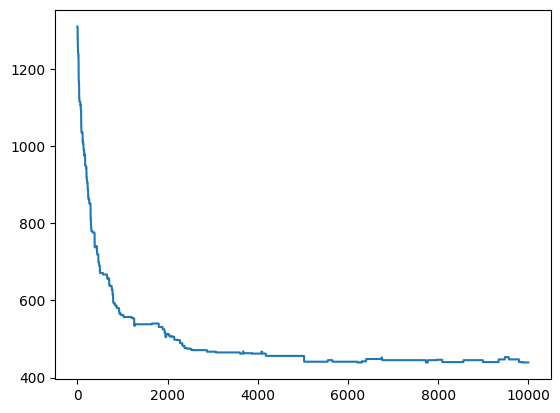

In [45]:
new_tour = tour.copy()
best_tour = tour.copy()

x_data_plot=[]
y_data_plot=[]

delta_list = []
bad_moves = 0
good_moves = 0
no_moves =0

rng = np.random.default_rng(seed=42)

for i in range(0,number_of_iterations):
    #Perform a random 2-Opt swap
    j = rng.integers(low=1, high=round(len(tour)-3))
    k = rng.integers(low=j+2, high=round(len(tour)))
    new_tour = tour.copy()
    new_tour[j:k] = tour[k-1:j-1:-1]

    
    #Calculate difference in tour values
    delta = cost(new_tour) - cost(tour)
    delta_list.append(delta)
    #temp = temp/(1+beta*temp)
    
    if delta <= 0:
        tour = new_tour.copy()
        good_moves = good_moves + 1
    
    #If move is bad and you reject move, reheat
    if delta > 0 and (random.uniform(0, 1) < 0.1):
        temp = (1+gamma)*temp
        bad_moves = bad_moves + 1

    #If move is bad and you reject move, reheat
    if delta > 0 and (random.uniform(0, 1) >= math.exp(-delta/temp)):
        temp = (1+gamma)*temp
        no_moves = no_moves + 1
        
    #if move is bad and you accept move, cool
    if delta > 0 and (random.uniform(0, 1) < math.exp(-delta/temp)):
        temp = temp/(1+beta*temp)
        tour = new_tour.copy()
        bad_moves = bad_moves + 1
    
    if cost(tour) < cost(best_tour):
        best_tour = tour.copy()

    x_data_plot.append(i)
    #y_data_plot.append(cost(best_tour))
    y_data_plot.append(cost(tour))
    
    
plt.plot(x_data_plot,y_data_plot)
plt.show()
    

In [87]:
print(best_tour, cost(best_tour))

[15, 49, 8, 48, 4, 37, 10, 31, 0, 21, 27, 30, 7, 25, 6, 22, 23, 13, 24, 17, 3, 16, 36, 14, 43, 41, 18, 40, 12, 39, 46, 11, 45, 50, 26, 5, 47, 42, 1, 28, 20, 33, 29, 9, 38, 32, 44, 19, 34, 35, 2, 15] 544


In [88]:
res = list(filter(lambda x : x > 0, delta_list))

In [89]:
import statistics
print("mean delta is: ", statistics.mean(res))
print("max delta is: ", max(res))

mean delta is:  23
max delta is:  113


In [90]:
temp

25.404677842392875

In [91]:
math.exp(-statistics.mean(res)/temp)

0.40440231136289356

In [92]:
math.exp(-max(res)/temp)

0.011701950721192102

In [93]:
print("Number of good moves", good_moves)
print("Number of bad moves", bad_moves)
print("Number of no moves", no_moves)

Number of good moves 4069
Number of bad moves 3794
Number of no moves 2109


In [13]:
import statistics

def print_results(best_tour, temp, delta_list, moves):
    print(best_tour)
    print(cost(best_tour))
    res = list(filter(lambda x : x > 0, delta_list))
    print("mean delta is: ", statistics.mean(res))
    print("max delta is: ", max(res))
    print(math.exp(-statistics.mean(res)/temp))
    print(math.exp(-max(res)/temp))
    print("Number of good moves", moves[0])
    print("Number of bad moves", moves[1])
    print("Number of no moves", moves[2])

In [26]:
def anneal(
    tour,
    number_of_iterations = 10000,
    temp = 700,
    beta = .00001,
    gamma = .01*beta
    ):

    new_tour = tour.copy()
    best_tour = tour.copy()

    x_data_plot=[]
    y_data_plot=[]

    delta_list = []
    bad_moves = 0
    good_moves = 0
    no_moves =0

    rng = np.random.default_rng(seed=42)

    for i in range(0,number_of_iterations):
        #Perform a random 2-Opt swap
        j = rng.integers(low=1, high=round(len(tour)-3))
        k = rng.integers(low=j+2, high=round(len(tour)))
        
        new_tour = tour.copy()
        new_tour[j:k] = tour[k-1:j-1:-1]

        
        #Calculate difference in tour values
        delta = cost(new_tour) - cost(tour)
        delta_list.append(delta)
        #temp = temp/(1+beta*temp)
        
        if delta <= 0:
            tour = new_tour.copy()
            good_moves = good_moves + 1
        
        #If move is bad and you reject move, reheat
        if delta > 0 and (random.uniform(0, 1) >= math.exp(-delta/temp)):
            temp = (1+gamma)*temp
            no_moves = no_moves + 1
            
        #if move is bad and you accept move, cool
        if delta > 0 and (random.uniform(0, 1) < math.exp(-delta/temp)):
            temp = temp/(1+beta*temp)
            tour = new_tour.copy()
            bad_moves = bad_moves + 1
        
        if cost(tour) < cost(best_tour):
            best_tour = tour.copy()

        x_data_plot.append(i)
        #y_data_plot.append(cost(best_tour))
        y_data_plot.append(cost(tour))
        
    moves = [good_moves, bad_moves, no_moves]
        
    plt.plot(x_data_plot,y_data_plot)
    plt.show()
        
    return best_tour, temp, delta_list, moves

Increase initial temperature, increase the cooling rate; x10

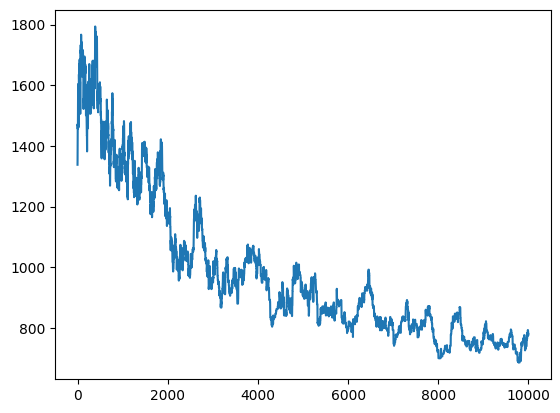

In [27]:
best_tour, temp, delta_list, moves = anneal(tour,
    number_of_iterations = 10000,
    temp = 7000,
    beta = .0001,
    gamma = .01*beta
    )

#print_results(best_tour, temp, delta_list, moves)

Temperature: 200


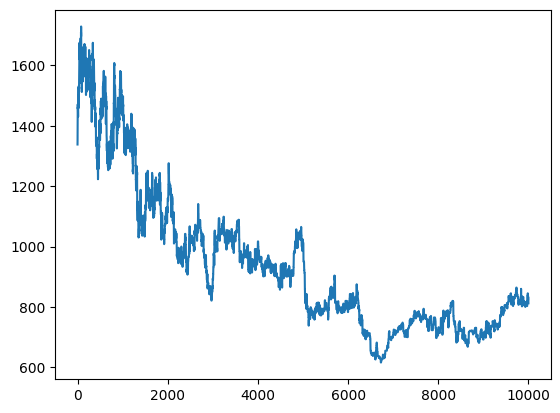

Best Cost: 616
Temperature: 300


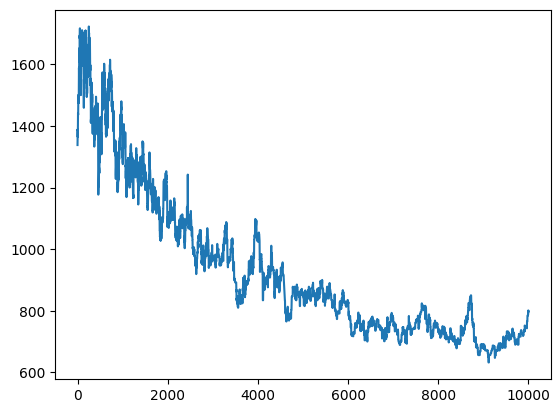

Best Cost: 632
Temperature: 400


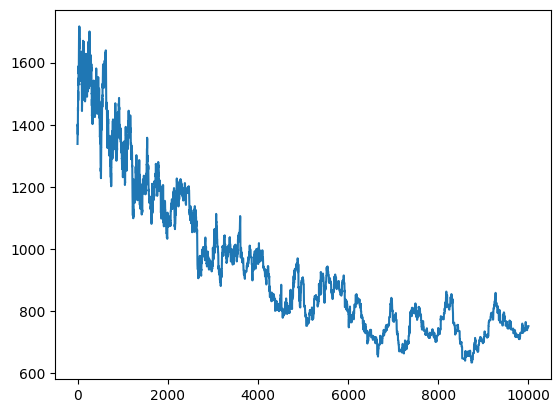

Best Cost: 635
Temperature: 500


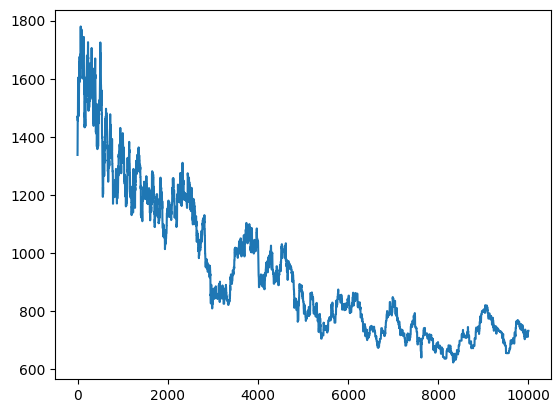

Best Cost: 624
Temperature: 600


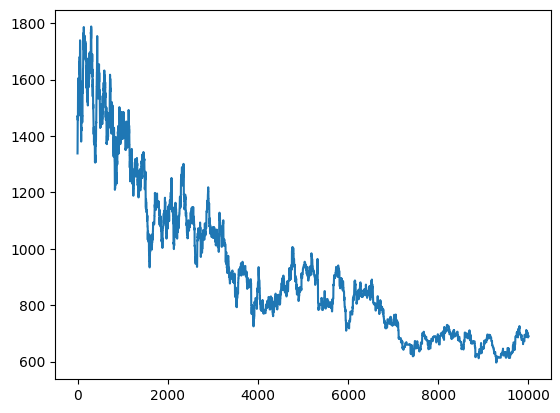

Best Cost: 597
Temperature: 700


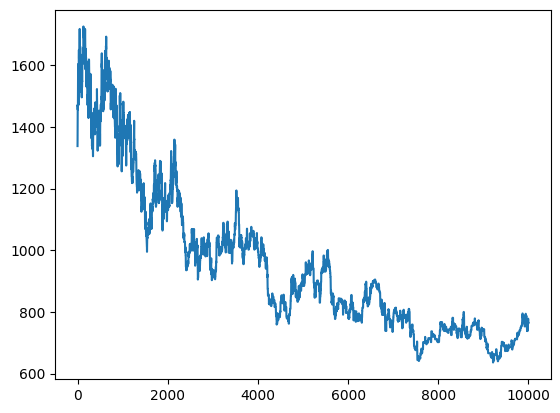

Best Cost: 636
Temperature: 800


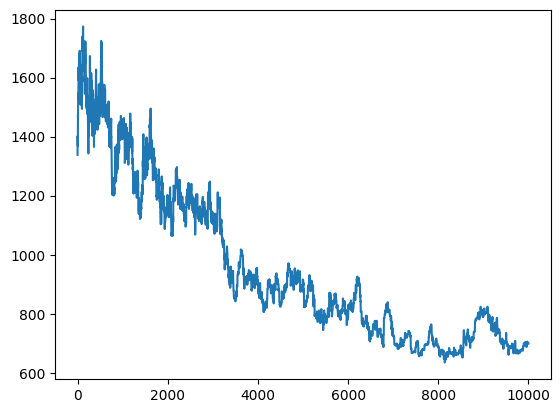

Best Cost: 635
Temperature: 900


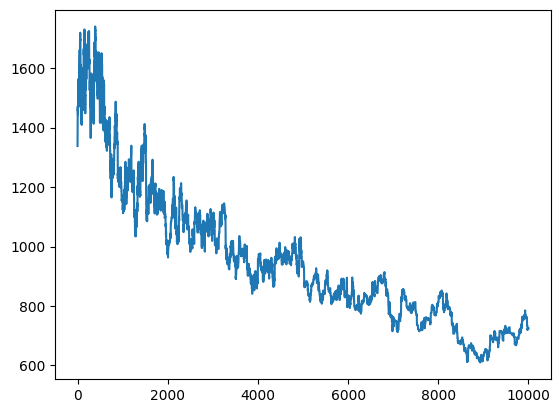

Best Cost: 610
Temperature: 1000


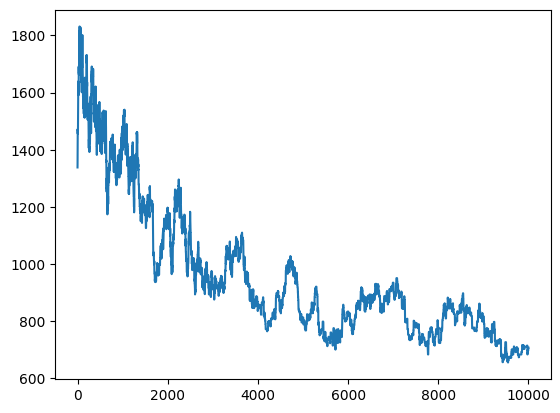

Best Cost: 656
Temperature: 1100


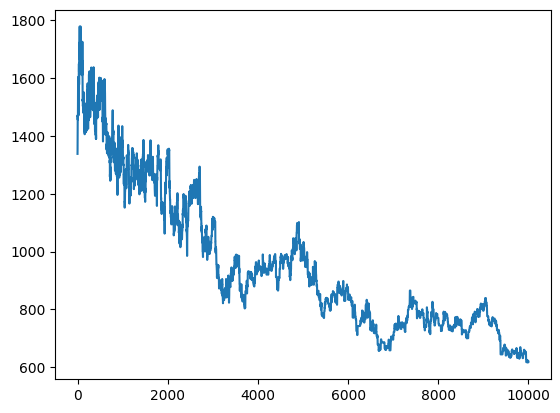

Best Cost: 616
Temperature: 1200


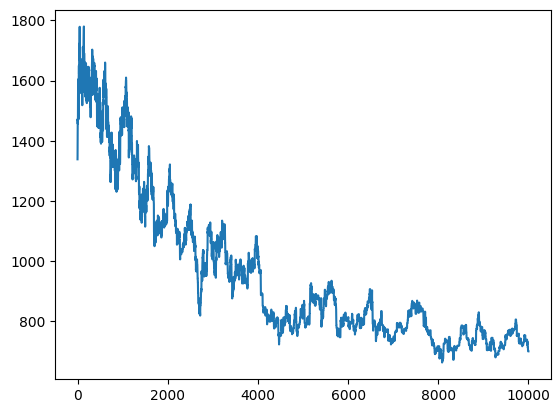

Best Cost: 662
Temperature: 1300


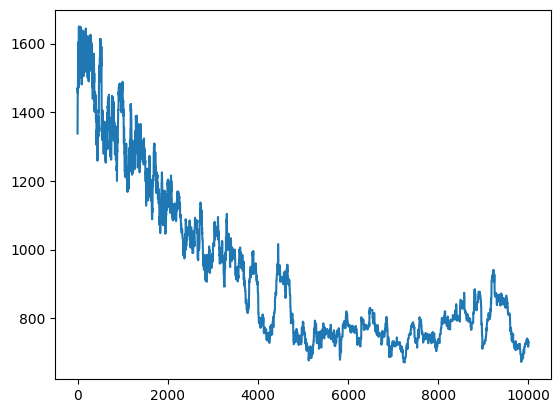

Best Cost: 671
Temperature: 1400


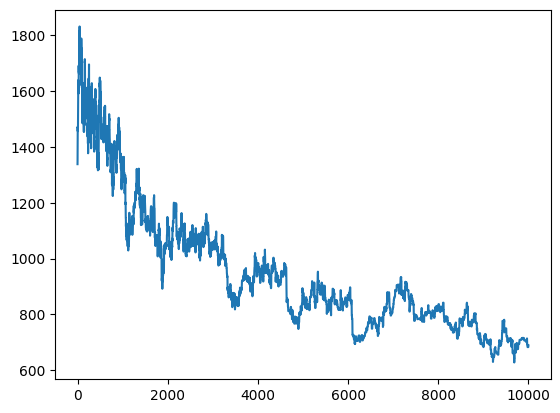

Best Cost: 628
Temperature: 1500


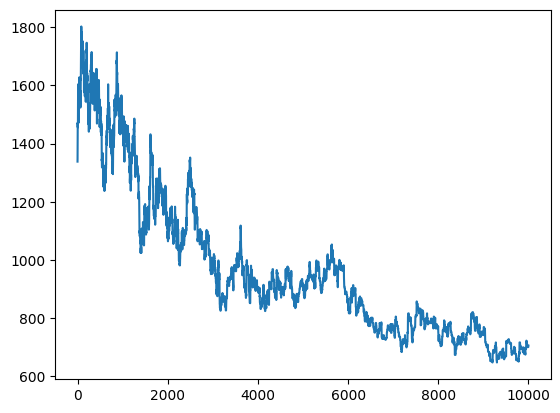

Best Cost: 647
Temperature: 1600


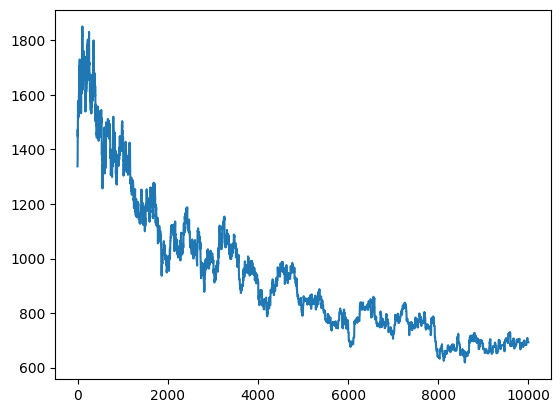

Best Cost: 619
Temperature: 1700


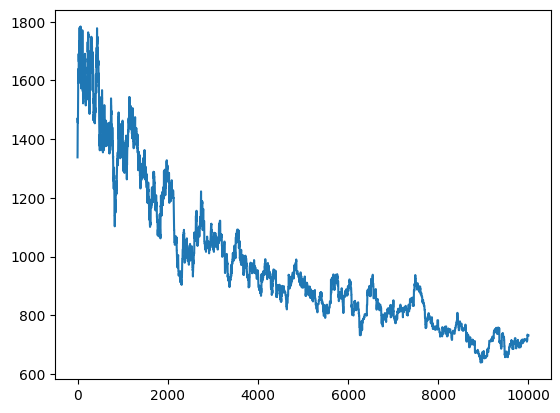

Best Cost: 639
Temperature: 1800


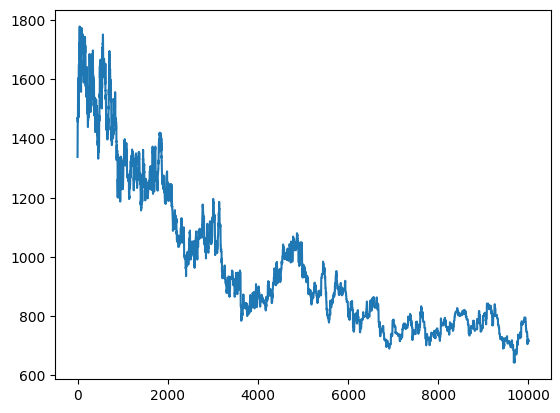

Best Cost: 643
Temperature: 1900


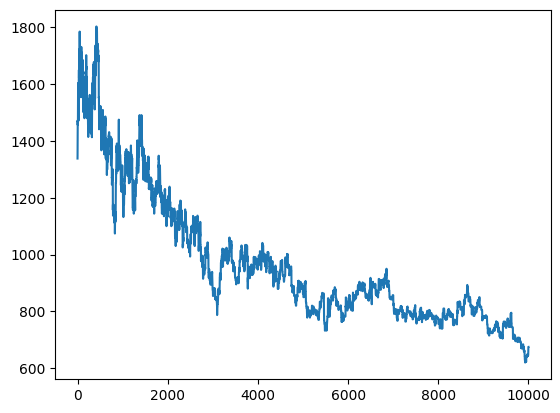

Best Cost: 620
[15, 20, 28, 19, 34, 35, 2, 27, 30, 25, 23, 22, 6, 0, 50, 21, 7, 26, 46, 47, 42, 5, 13, 24, 12, 39, 40, 41, 18, 17, 3, 16, 36, 14, 43, 44, 32, 48, 29, 33, 38, 9, 37, 45, 11, 31, 4, 10, 1, 49, 8, 15]
620
mean delta is:  34
max delta is:  139
0.005477267350804764
5.684827398203622e-10
Number of good moves 1745
Number of bad moves 1527
Number of no moves 6719


In [32]:
best ={'Temp':0, 'Value':10000000000, 'Tour': []}
for i in range(200, 2000, 100):
    print(f"Temperature: {i}")
    best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = i,
        beta = .0001,
        gamma = .01*beta
        )
    best_cost = cost(best_tour)
    print(f"Best Cost: {best_cost}")
    if best_cost < best["Value"]:
        best['value'] = best_cost
        best['Temp'] = i
        best['Tour'] = best_tour
        



print_results(best_tour, temp, delta_list, moves)

Beta: 1e-05


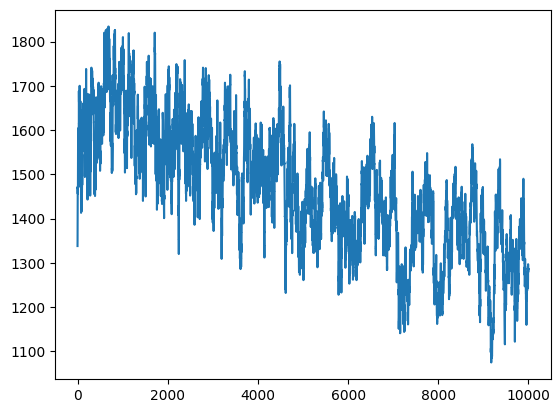

Best Cost: 1075
Beta: 0.0001


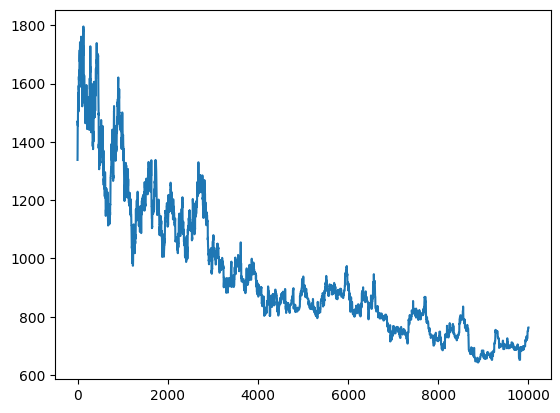

Best Cost: 643
Beta: 0.001


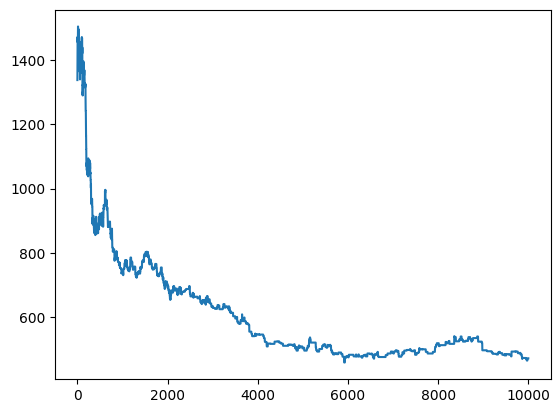

Best Cost: 458
Beta: 0.01


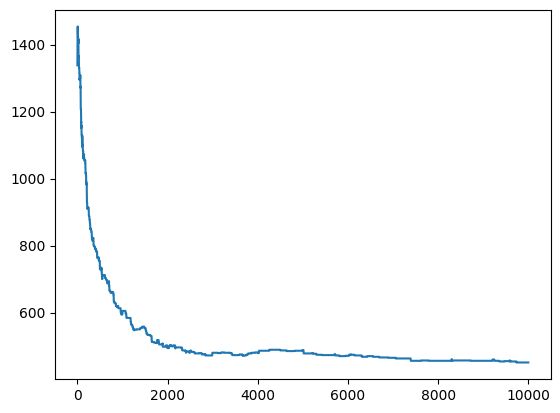

Best Cost: 451
Beta: 0.1


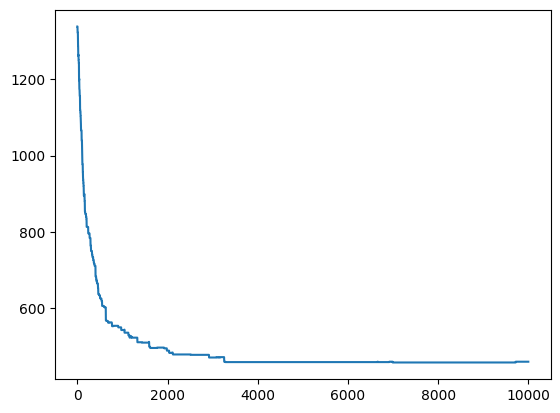

Best Cost: 458
Beta: 1


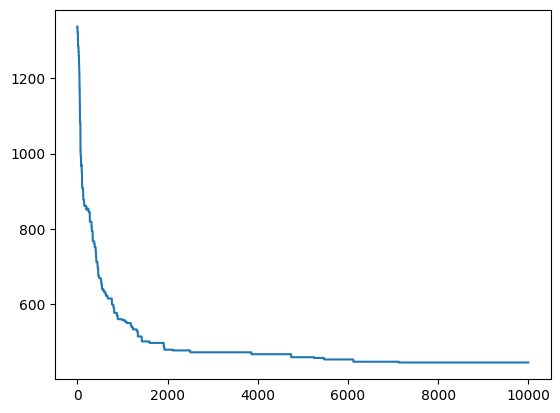

Best Cost: 445


In [33]:

best ={'Temp':0, 'Value':10000000000, 'Tour': []}
for i in [.00001, 0.0001, 0.001, 0.01, 0.1, 1]:
    print(f"Beta: {i}")
    best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 800,
        beta = i,
        gamma = .01*beta
        )
    best_cost = cost(best_tour)
    print(f"Best Cost: {best_cost}")
    if best_cost < best["Value"]:
        best['value'] = best_cost
        best['Temp'] = i
        best['Tour'] = best_tour

Gamma: 0.0001


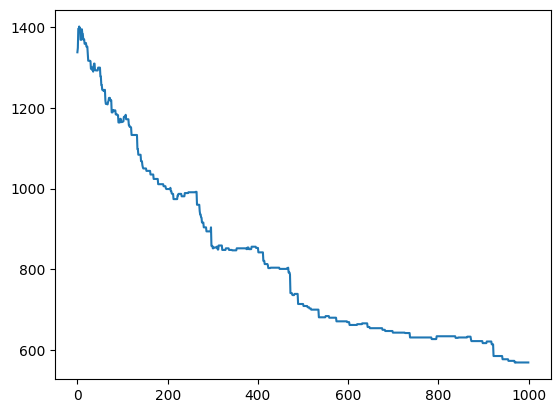

Best Cost: 569
Gamma: 0.001


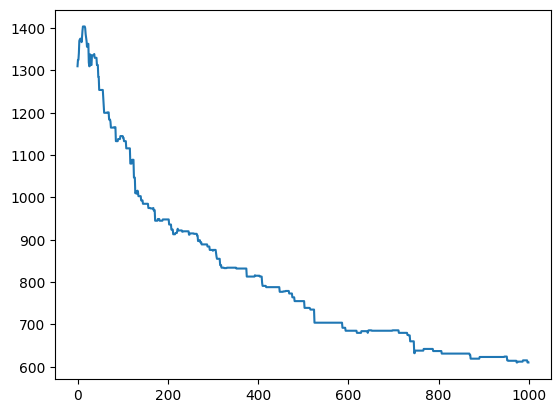

Best Cost: 610
Gamma: 0.01


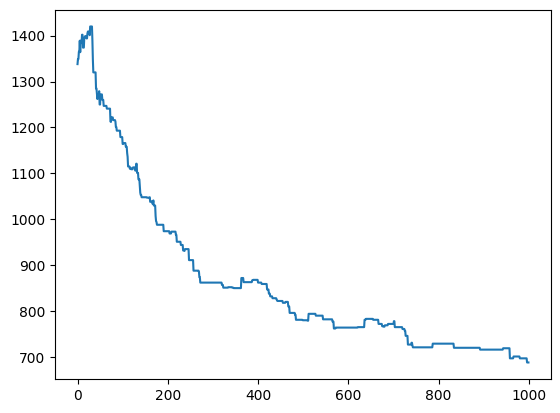

Best Cost: 688
Gamma: 0.1


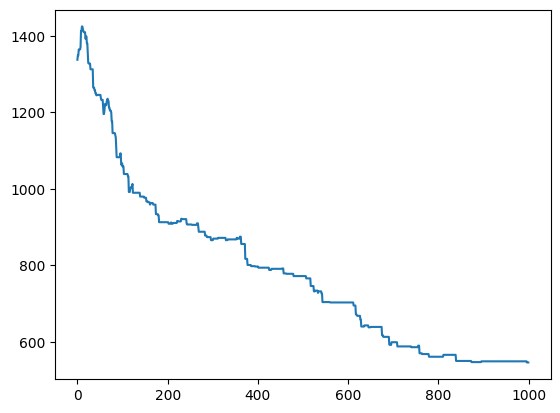

Best Cost: 546
Gamma: 1


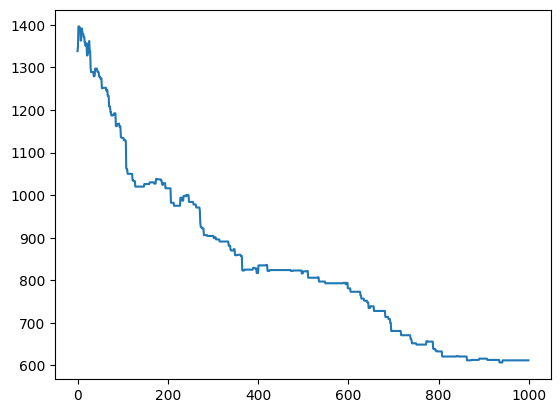

Best Cost: 607
Gamma: 10


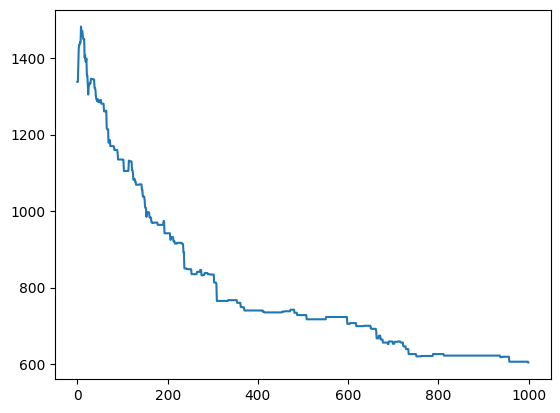

Best Cost: 604
Gamma: 100


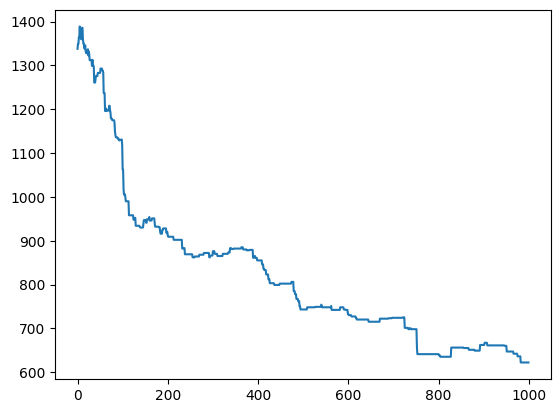

Best Cost: 622


In [35]:
best ={'Temp':0, 'Value':10000000000, 'Tour': []}
for i in [.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    print(f"Gamma: {i}")
    best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 1000,
        temp = 800,
        beta = 0.01,
        gamma = i*beta
        )
    best_cost = cost(best_tour)
    print(f"Best Cost: {best_cost}")
    if best_cost < best["Value"]:
        best['value'] = best_cost
        best['Temp'] = i
        best['Tour'] = best_tour

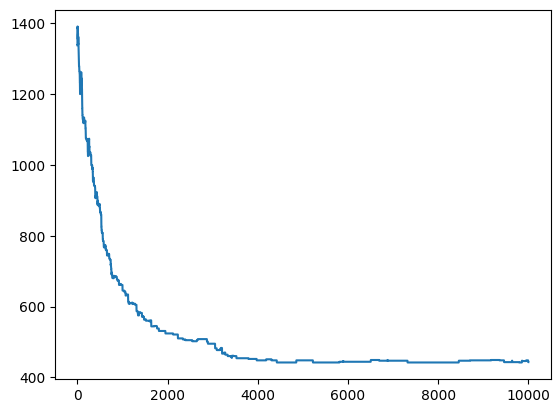

Best Cost: 442


In [37]:
best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 1800,
        beta = 0.01,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")
if best_cost < best["Value"]:
    best['value'] = best_cost
    best['Temp'] = i
    best['Tour'] = best_tour

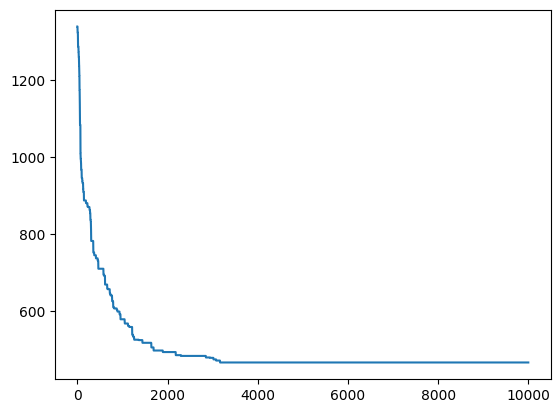

Best Cost: 467


In [39]:
best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 1800,
        beta = 10,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")
if best_cost < best["Value"]:
    best['value'] = best_cost
    best['Temp'] = i
    best['Tour'] = best_tour

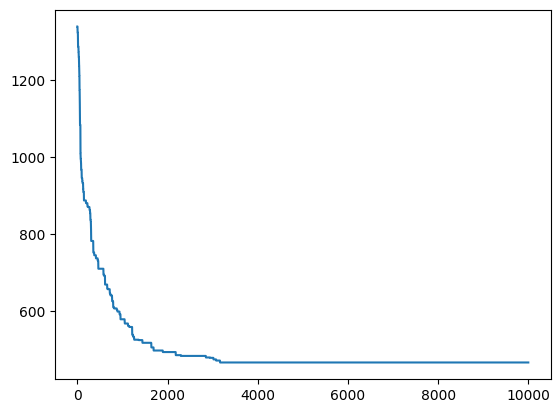

Best Cost: 467


In [40]:
best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 10000,
        beta = 10,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")
if best_cost < best["Value"]:
    best['value'] = best_cost
    best['Temp'] = i
    best['Tour'] = best_tour

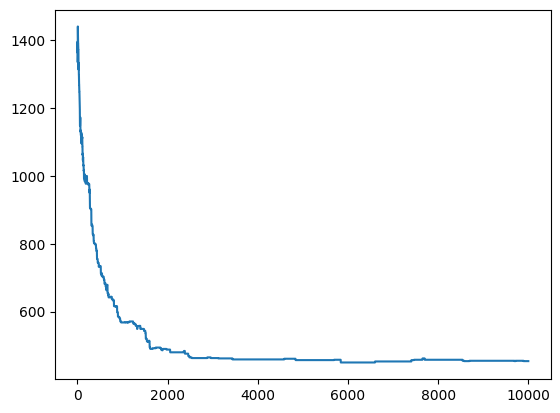

Best Cost: 450


In [42]:
best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 900,
        beta = 0.01,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")

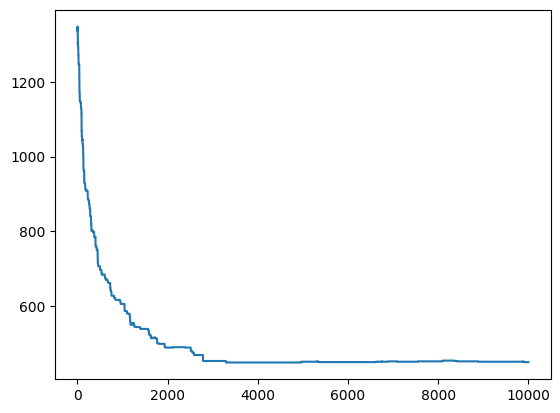

Best Cost: 448


In [43]:
best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 9000,
        beta = 0.1,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")

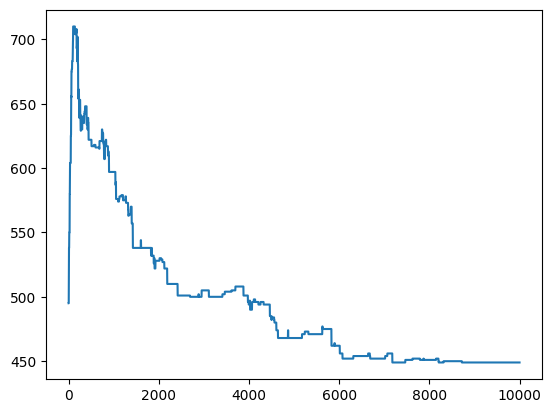

Best Cost: 439


In [46]:
best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 9000,
        beta = 0.01,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")

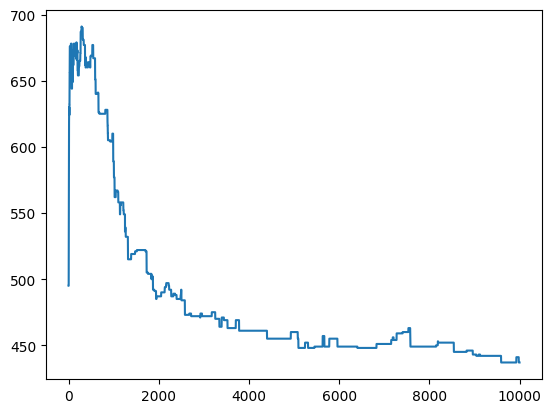

Best Cost: 437


In [47]:
def anneal(
    tour,
    number_of_iterations = 10000,
    temp = 700,
    beta = .00001,
    gamma = .01*beta
    ):

    new_tour = tour.copy()
    best_tour = tour.copy()

    x_data_plot=[]
    y_data_plot=[]

    delta_list = []
    bad_moves = 0
    good_moves = 0
    no_moves =0

    rng = np.random.default_rng(seed=42)

    for i in range(0,number_of_iterations):
        #Perform a random 2-Opt swap
        j = rng.integers(low=1, high=round(len(tour)-3))
        k = rng.integers(low=j+2, high=round(len(tour)))
        
        new_tour = tour.copy()
        new_tour[j:k] = tour[k-1:j-1:-1]

    
        #Calculate difference in tour values
        delta = cost(new_tour) - cost(tour)
        delta_list.append(delta)
        #temp = temp/(1+beta*temp)
        
        if delta <= 0:
            tour = new_tour.copy()
            good_moves = good_moves + 1

         #If move is bad and you reject move, reheat
        if delta > 0 and (random.uniform(0, 1) < 0.1):
            temp = (1+gamma)*temp
            bad_moves = bad_moves + 1
        
        #If move is bad and you reject move, reheat
        if delta > 0 and (random.uniform(0, 1) >= math.exp(-delta/temp)):
            temp = (1+gamma)*temp
            no_moves = no_moves + 1
            
        #if move is bad and you accept move, cool
        if delta > 0 and (random.uniform(0, 1) < math.exp(-delta/temp)):
            temp = temp/(1+beta*temp)
            tour = new_tour.copy()
            bad_moves = bad_moves + 1
        
        if cost(tour) < cost(best_tour):
            best_tour = tour.copy()

        x_data_plot.append(i)
        #y_data_plot.append(cost(best_tour))
        y_data_plot.append(cost(tour))
        
    moves = [good_moves, bad_moves, no_moves]
        
    plt.plot(x_data_plot,y_data_plot)
    plt.show()
        
    return best_tour, temp, delta_list, moves

best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 9000,
        beta = 0.01,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")

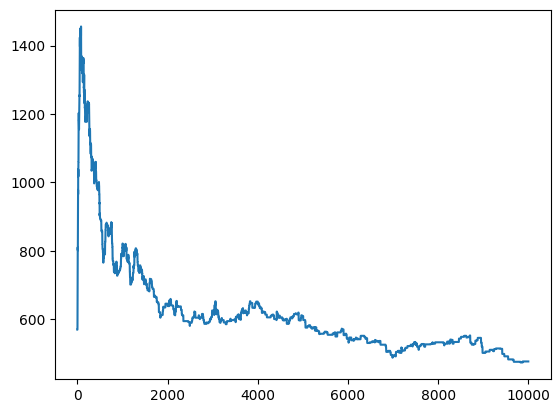

Best Cost: 473


In [15]:
def anneal(
    tour,
    number_of_iterations = 10000,
    temp = 700,
    beta = .00001,
    gamma = .01*beta
    ):

    new_tour = tour.copy()
    best_tour = tour.copy()

    x_data_plot=[]
    y_data_plot=[]

    delta_list = []
    bad_moves = 0
    good_moves = 0
    no_moves =0

    rng = np.random.default_rng(seed=42)

    for i in range(0,number_of_iterations):
        #Perform a random 2-Opt swap
        j = rng.integers(low=1, high=round(len(tour)-3))
        k = rng.integers(low=j+2, high=round(len(tour)))
        
        new_tour = tour.copy()
        new_tour[j:k] = tour[k-1:j-1:-1]

    
        #Calculate difference in tour values
        delta = cost(new_tour) - cost(tour)
        delta_list.append(delta)
        #temp = temp/(1+beta*temp)
        
        if delta <= 0:
            tour = new_tour.copy()
            good_moves = good_moves + 1

         #If move is bad and you accept anyway
        if delta > 0 and (random.uniform(0, 1) < 0.2):
            temp = (1+gamma)*temp
            bad_moves = bad_moves + 1
        
        #If move is bad and you reject move, reheat
        if delta > 0 and (random.uniform(0, 1) >= math.exp(-delta/temp)):
            temp = (1+gamma)*temp
            no_moves = no_moves + 1
            
        #if move is bad and you accept move, cool
        if delta > 0 and (random.uniform(0, 1) < math.exp(-delta/temp)):
            temp = temp/(1+beta*temp)
            tour = new_tour.copy()
            bad_moves = bad_moves + 1
        
        if cost(tour) < cost(best_tour):
            best_tour = tour.copy()

        x_data_plot.append(i)
        #y_data_plot.append(cost(best_tour))
        y_data_plot.append(cost(tour))
        
    moves = [good_moves, bad_moves, no_moves]
        
    plt.plot(x_data_plot,y_data_plot)
    plt.show()
        
    return best_tour, temp, delta_list, moves

best_tour, temp, delta_list, moves = anneal(tour,
        number_of_iterations = 10000,
        temp = 9000,
        beta = 0.001,
        gamma = 0.1*beta
        )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")

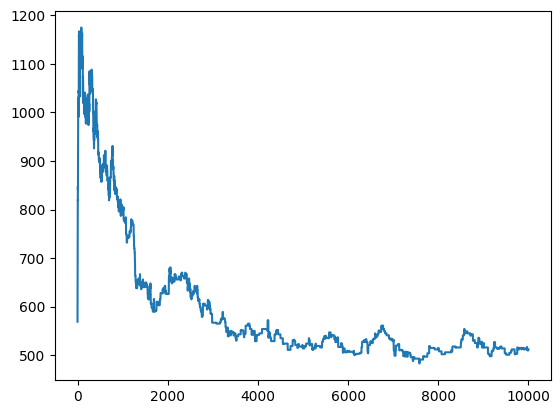

Best Cost: 483


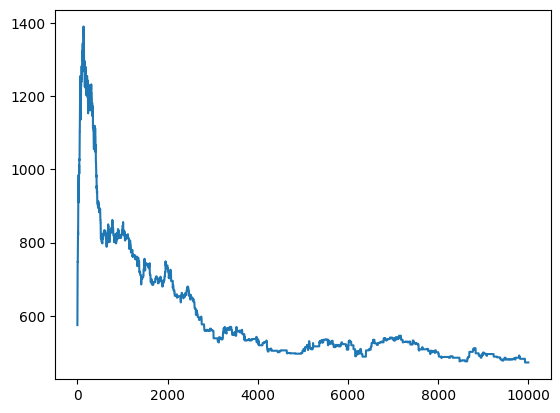

Best Cost: 473


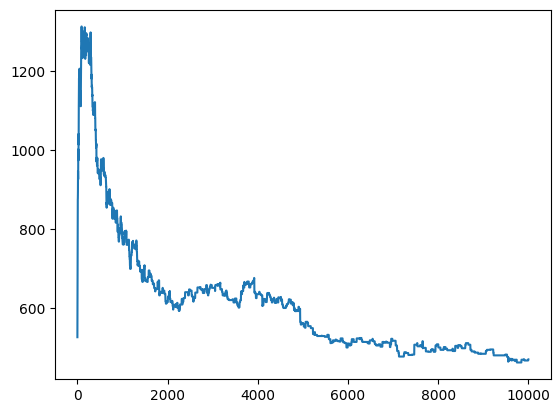

Best Cost: 463


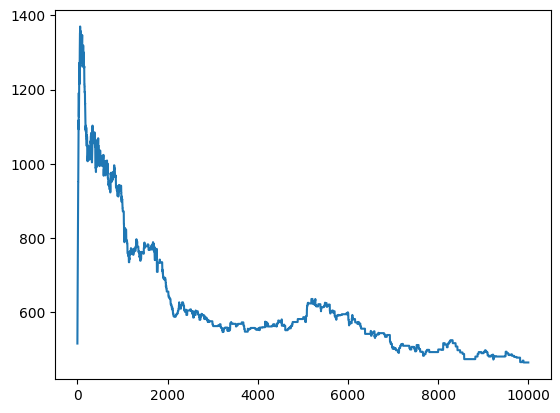

Best Cost: 463


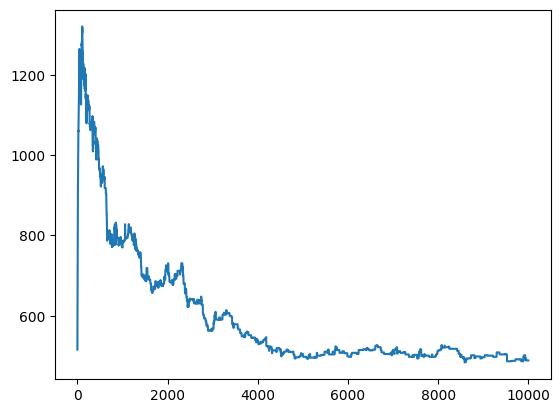

Best Cost: 463


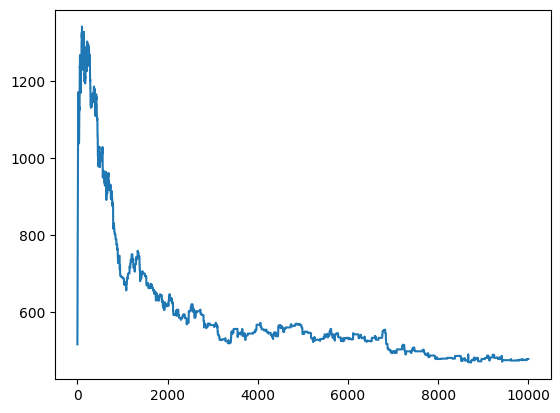

Best Cost: 463


In [19]:
best_tour, temp, delta_list, moves = anneal(tour,
    number_of_iterations = 10000,
    temp = 9000,
    beta = 0.001,
    gamma = 0.1*beta
    )
best_cost = cost(best_tour)
print(f"Best Cost: {best_cost}")
for _ in range(5):
    best_tour, temp, delta_list, moves = anneal(best_tour,
        number_of_iterations = 10000,
        temp = 9000,
        beta = 0.001,
        gamma = 0.1*beta
        )
    best_cost = cost(best_tour)
    print(f"Best Cost: {best_cost}")

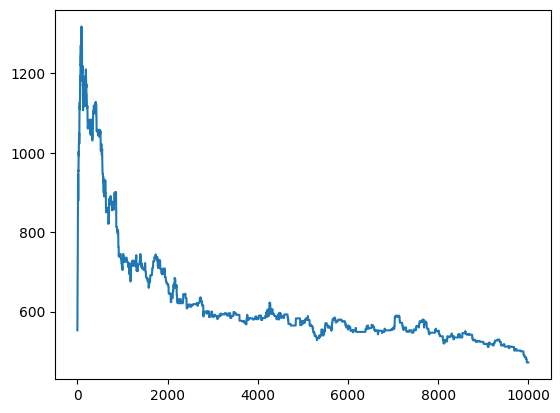

Best Cost: 449


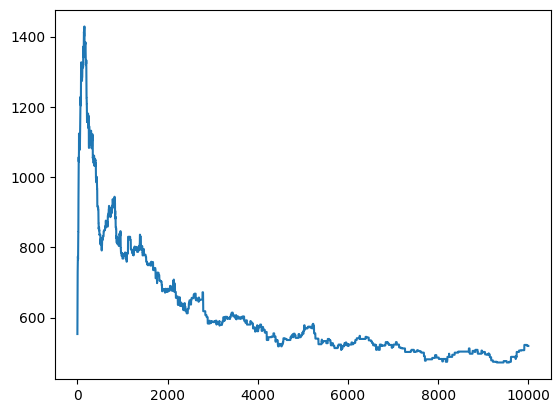

Best Cost: 449


In [22]:
for _ in range(2):
    best_tour, temp, delta_list, moves = anneal(best_tour,
        number_of_iterations = 10000,
        temp = 9000,
        beta = 0.001,
        gamma = 0.1*beta
        )
    best_cost = cost(best_tour)
    print(f"Best Cost: {best_cost}")